In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_json('data.json')

In [3]:
df.head()

,id,timestamp,latitude,longitude
0,David,2020-07-04 15:35:30,13.148953,77.593651
1,David,2020-07-04 16:35:30,13.222397,77.652828
2,Frank,2020-07-04 14:35:30,13.236507,77.693792
3,Carol,2020-07-04 21:35:30,13.163716,77.562842
4,Ivan,2020-07-04 22:35:30,13.232095,77.580273


In [4]:
df.shape

(100, 4)

In [5]:
df['id'].nunique()

10

In [6]:
from sklearn.cluster import DBSCAN

C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, e

In [29]:
epsilon = 0.0024384  # a radial distance of 8 feet in kilometers
model = DBSCAN(eps = epsilon, min_samples=2, metric= 'haversine')
model.fit(df[['latitude','longitude']])
df['cluster'] = model.labels_.tolist()


In [30]:
print(model.labels_)

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  2 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1
 -1  2 -1 -1]


In [31]:
import seaborn as sns

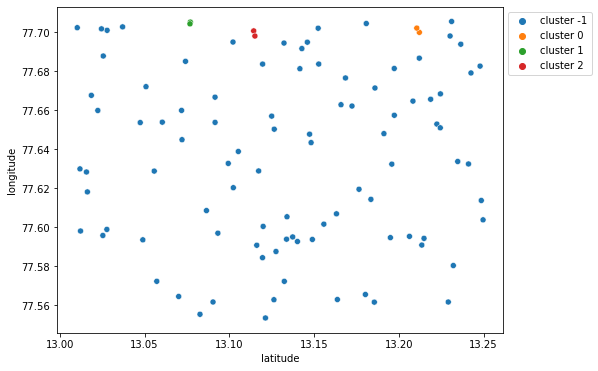

In [32]:
plt.figure(figsize=(8,6))
labels = model.labels_
sns.scatterplot(x=df['latitude'],y=df['longitude'],hue=['cluster {}'.format(x) for x in labels])
plt.legend(bbox_to_anchor = [1,1])
plt.show()

In [33]:
def get_infected_names(input_name):
    input_name_clusters = []
    for i in range(len(df)):
        if df['id'][i] == input_name:
            if df['cluster'][i] in input_name_clusters:
                pass
            else:
                input_name_clusters.append(df['cluster'][i])
    
    infected_names = []
    for cluster in input_name_clusters:
        if cluster != -1:
            id_in_cluster = df.loc[df['cluster'] == cluster, 'id']
            for i in id_in_cluster:
                if i not in infected_names:
                    infected_names.append(i)
                else:
                    pass
    
    
    return infected_names
                

In [34]:
print(get_infected_names('Bob'))

['Bob', 'Ivan', 'Judy']
